# Ejercicio 3 - Simulación de distribuciones condicionadas

### Julian Ferres - Nro.Padrón 101483

## Enunciado:

Sea $X$ \~ $N(0,1)$ truncada al intervalo $[-1,1]$

Imagine $m(x) = E[Y | X=x]$ como:

   
   \begin{equation}
     m(x) := \left\{
 \begin{array}{ll}
      \frac{(x + 2)^2}{2} & \mathrm{si\ } si -1\leq x<-0.5 \\
    \frac{x}{2}+0.875     & \mathrm{si\ } -0.5 \leq x \leq 0\\
    -5(x-0.2)^2 +1.075 & \mathrm{si\ } 0 < x \leq 0.5 \\
    x + 0.125 & \mathrm{si\ } 0.5 \leq x < 1 
           \end{array}
         \right.
    \end{equation}

Dado un $x$, la distribución condicional de $Y - m(x)$ es $N(0, \sigma ^2(x))$,

con $\sigma(x)=0.2-0.1 * \cos(2x)$

- Se pide simular $200$ puntos $(X,Y)$, y graficarlos en un plano. Además, vamos a necesitar
Los $200$ pares ordenados en cuestión, para hacer análisis posteriores

- Reconstruir $m(x)$ con los $200$ puntos, para eso:

Realizar una partición de $[-1,1]$ en intervalos de longitud $h$ y en cada intervalo encontrar el polinomio $f$ de grado $M$ que minimice el error cuadratico medio $$ \frac{1}{n} \sum |f(X_i)-Y_i|^2$$

Usar:

1. $h = 0.5$ , $M=1$
2. $h = 0.1$ , $M=1$
3. $h = 0.25$ , $M=2$
4. $h = 0.5$ , $M=2$

## Solución:

#### Importo todas las librerias e inicializo funciones

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import cos, pi
from scipy.stats import truncnorm

In [2]:
m1 = lambda x: (x+2)**2/2
m2 = lambda x: x/2 + 0.875
m3 = lambda x: -5*(x-0.2)**2 + 1.075
m4 = lambda x: x + 0.125

In [3]:
def m(x):
    if -1 <= x < -0.5:
        return m1(x)
    if -0.5 <= x < 0:
        return m2(x)
    if 0 <= x < 0.5:
        return m3(x)
    if 0.5 <= x < 1:
        return m4(x)

m = np.vectorize(m)

In [4]:
#Me genero 1000 valores entre -1 y 1 para graficar m(x) 'suave'
x_0 = np.linspace(-1,1,1000) 
y_0 = m(x_0)

#### Normal truncada 

In [5]:
a , b = -1 , 1 #Limites de la normal truncada

In [6]:
#Genero 200 cuantiles de la normal truncada 
x1 = np.linspace(truncnorm.ppf(0.01, a, b),
                truncnorm.ppf(0.99, a, b), 200) 

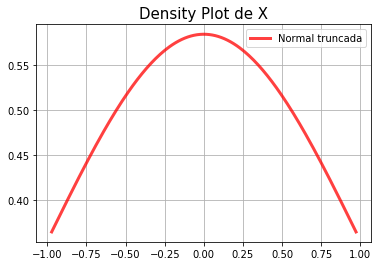

In [6]:
plt.plot(x1, truncnorm.pdf(x1, a, b),
        'r-', lw=3, alpha=0.75, label='Normal truncada')
plt.title("Density Plot de X",fontsize='15')
plt.legend(loc='best', frameon= True)
plt.grid()

In [7]:
x1 = truncnorm.rvs(a, b, size=200)
#Me genero la muestra de distribucion X

In [8]:
sigma = np.vectorize(lambda x : 0.2 - 0.1 * cos(2*pi*x))
normal = np.vectorize(np.random.normal)

y1 = normal( m(x1),sigma(x1))

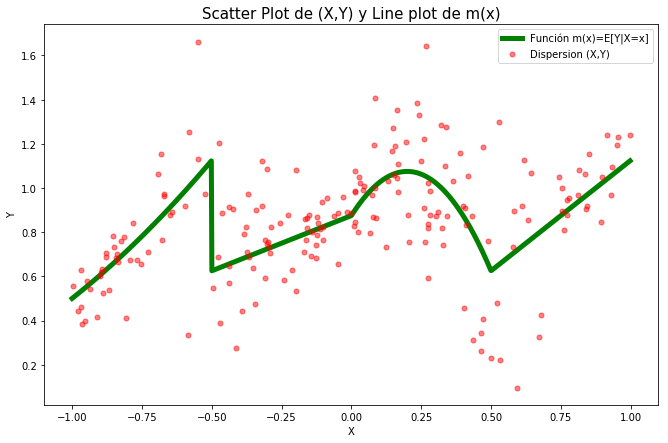

In [9]:
fig, ax = plt.subplots(figsize=(11,7))
plt.plot(x_0, y_0, 'g-', linewidth = 5, label = 'Función m(x)=E[Y|X=x]')
plt.legend(loc='best', frameon= True)

plt.plot(x1, y1, 'ro' ,markersize= 5, alpha = 0.5 ,label = 'Dispersion (X,Y)')
plt.legend(loc='best', frameon= True)

plt.title("Scatter Plot de (X,Y) y Line plot de m(x)", fontsize='15')
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

#### La muestra de los $200$ pares con distribución $(X,Y)$ se encuentra en la variable output

### Dejo los 200 puntos en el archivo simulacion.csv

In [32]:
d = {'X': x1 , 'Y': y1 }
output = pd.DataFrame(data=d)

In [33]:
output.to_csv("simulacion.csv" , index = False)

## Reconstruyo la regresión

#### Con h=0.5 y M=1 

In [10]:
partition = [[],[],[],[]]
for i in range(200):
    partition[int(2*(x1[i]+1))].append(i)

In [11]:
polinomio_a_trozos = []

cuadrado_de_los_errores1 = 0

for i in range(4):
    x_aux , y_aux = [x1[j] for j in partition[i]],[y1[j] for j in partition[i]]
    z = np.polyfit(x_aux,y_aux,1)
    polinomio_a_trozos.append(np.poly1d(z))
    
    #sumo los errores para cada trozo del polinomio
    for j in range(len(x_aux)):
        cuadrado_de_los_errores1 += (polinomio_a_trozos[i](x_aux[j])-y_aux[j])**2

In [12]:
xp=[]
xp.append(np.linspace(-1, -0.5, 200))
xp.append(np.linspace(-0.5,0, 200))
xp.append(np.linspace(0, 0.5, 200))
xp.append(np.linspace(0.5,1, 200))

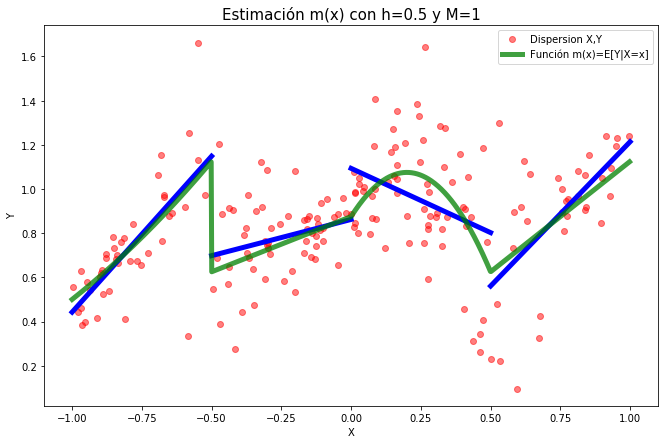

In [13]:
fig, ax = plt.subplots(figsize=(11,7))

plt.plot(x1, y1, 'ro', linewidth = 5, alpha = 0.5 ,label = 'Dispersion X,Y')
plt.legend(loc='best', frameon= True)

for i in range(4):
    plt.plot(xp[i], polinomio_a_trozos[i](xp[i]) ,'b-', linewidth = 5 )
   
plt.plot(x_0, y_0, 'g-', linewidth = 5, alpha = 0.75 ,label = 'Función m(x)=E[Y|X=x]')

plt.legend(loc='best', frameon= True)
plt.title("Estimación m(x) con h=0.5 y M=1", fontsize='15')
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

La estimación parece ajustarse bien a la función de regresion, no obstante, el error cuadrático medio es alto ya que no esta Overfitteando
a la muestra.

#### Estimación del error cuadrático medio

In [14]:
(cuadrado_de_los_errores1 / 200)**0.5

0.21146615768136706

#### Con h=0.1 y M=1 

In [15]:
partition = [[] for i in range(20)]
for i in range(200):
    partition[int(10*(x1[i]+1))].append(i)

In [16]:
polinomio_a_trozos = []
cuadrado_de_los_errores2 = 0

for i in range(20):
    x_aux , y_aux = [x1[j] for j in partition[i]],[y1[j] for j in partition[i]]
    z = np.polyfit(x_aux,y_aux,1)
    polinomio_a_trozos.append(np.poly1d(z))
    
    #sumo los errores para cada trozo del polinomio
    for j in range(len(x_aux)):
        cuadrado_de_los_errores2 += (polinomio_a_trozos[i](x_aux[j])-y_aux[j])**2

In [17]:
xp=[]

for i in range(20):
    xp.append(np.linspace(-1+i*(1/10), -0.9+i*(1/10), 200))

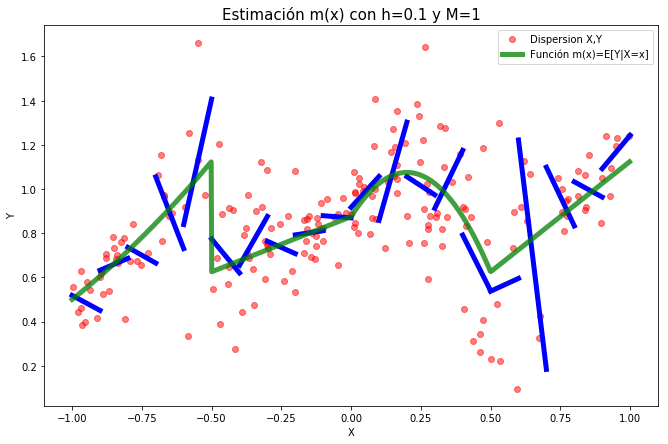

In [18]:
fig, ax = plt.subplots(figsize=(11,7))

plt.plot(x1, y1, 'ro', linewidth = 5, alpha = 0.5 ,label = 'Dispersion X,Y')
plt.legend(loc='best', frameon= True)

for i in range(20):
    plt.plot(xp[i], polinomio_a_trozos[i](xp[i]) ,'b-', linewidth = 5 )

plt.plot(x_0, y_0, 'g-', linewidth = 5, alpha = 0.75,label = 'Función m(x)=E[Y|X=x]')
plt.legend(loc='best', frameon= True)
plt.title("Estimación m(x) con h=0.1 y M=1", fontsize='15')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Se puede observar un claro caso de Overfitting, donde el error cuadrático medio es medianamente bajo, pero no estima correctamente la regresión.

#### Estimación del error cuadrático medio

In [19]:
(cuadrado_de_los_errores2 / 200)**0.5

0.1885956312812796

#### Con h=0.25 y M=2 

In [20]:
partition = [[] for i in range(8)]
for i in range(200):
    partition[int(4*(x1[i]+1))].append(i)

In [21]:
polinomio_a_trozos = []
cuadrado_de_los_errores3 = 0

for i in range(8):
    x_aux , y_aux = [x1[j] for j in partition[i]],[y1[j] for j in partition[i]]
    z = np.polyfit(x_aux,y_aux,2)
    polinomio_a_trozos.append(np.poly1d(z))
    
    #sumo los errores para cada trozo del polinomio
    for j in range(len(x_aux)):
        cuadrado_de_los_errores3 += (polinomio_a_trozos[i](x_aux[j])-y_aux[j])**2

In [22]:
xp=[]

for i in range(8):
    xp.append(np.linspace(-1+i*(1/4), -1+(i+1)*(1/4), 200))

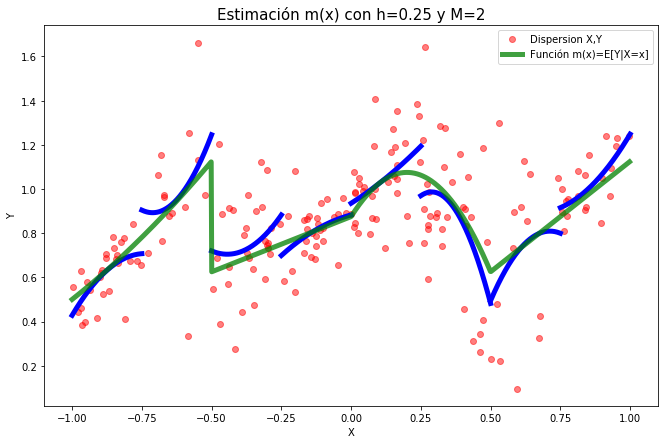

In [23]:
fig, ax = plt.subplots(figsize=(11,7))

plt.plot(x1, y1, 'ro', linewidth = 5,alpha = 0.5, label ='Dispersion X,Y')
plt.legend(loc='best', frameon= True)

for i in range(8):
    plt.plot(xp[i], polinomio_a_trozos[i](xp[i]) ,'b-', linewidth = 5 )

plt.plot(x_0, y_0, 'g-', linewidth = 5,alpha = 0.75 ,label = 'Función m(x)=E[Y|X=x]')
plt.legend(loc='best', frameon= True)
plt.title("Estimación m(x) con h=0.25 y M=2", fontsize='15')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Se puede observar un claro caso de Overfitting, donde el error cuadrático medio es medianamente bajo, pero no estima correctamente la regresión.

#### Estimación del error cuadrático medio

In [24]:
(cuadrado_de_los_errores3 / 200)**0.5

0.20085090075741924

#### Con h=0.5 y M=2 

In [25]:
partition = [[] for i in range(4)]
for i in range(200):
    partition[int(2*(x1[i]+1))].append(i)

In [26]:
polinomio_a_trozos = []
cuadrado_de_los_errores4 = 0

for i in range(4):
    x_aux , y_aux = [x1[j] for j in partition[i]],[y1[j] for j in partition[i]]
    z = np.polyfit(x_aux,y_aux,2)
    polinomio_a_trozos.append(np.poly1d(z))
    
    #sumo los errores para cada trozo del polinomio
    for j in range(len(x_aux)):
        cuadrado_de_los_errores4 += (polinomio_a_trozos[i](x_aux[j])-y_aux[j])**2

In [27]:
xp=[]
for i in range(4):
    xp.append(np.linspace(-1+i*(1/2), -1+(i+1)*(1/2), 200))

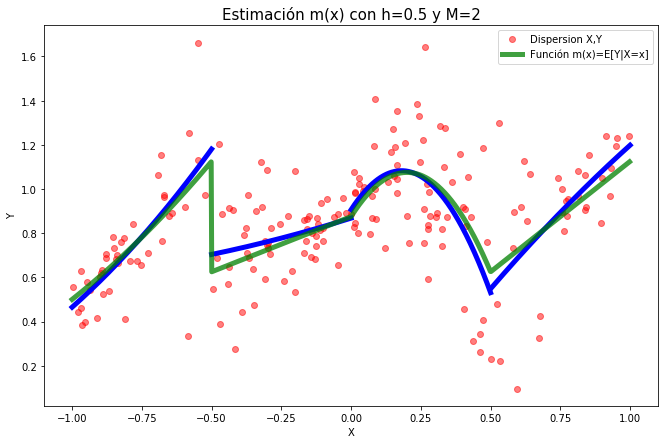

In [28]:
fig, ax = plt.subplots(figsize=(11,7))

plt.plot(x1, y1, 'ro', linewidth = 5,alpha = 0.5, label = 'Dispersion X,Y')
plt.legend(loc='best', frameon= True)

for i in range(4):
    plt.plot(xp[i], polinomio_a_trozos[i](xp[i]) ,'b-', linewidth = 5)
    
plt.plot(x_0, y_0, 'g-', linewidth = 5,alpha = 0.75 ,label = 'Función m(x)=E[Y|X=x]')
plt.legend(loc='best', frameon= True)
plt.title("Estimación m(x) con h=0.5 y M=2", fontsize='15')
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

Se ve que el ECM es ligeramente superior a los casos con Overfitting, se ve que predice la regresión de forma bastante acertada.

#### Estimación del error cuadrático medio

In [29]:
(cuadrado_de_los_errores4 / 200)**0.5

0.20321524367619534

In [30]:
(cuadrado_de_los_errores1 / 200)**0.5 ,\
(cuadrado_de_los_errores2 / 200)**0.5 ,\
(cuadrado_de_los_errores3 / 200)**0.5 ,\
(cuadrado_de_los_errores4 / 200)**0.5

(0.21146615768136706,
 0.1885956312812796,
 0.20085090075741924,
 0.20321524367619534)

Link al Repo de GitHub: https://github.com/julianferres/Aprendizaje-Estadistico.git